In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/better-life-index-2024-life-satisfaction/better-life-index-2024.csv


In [35]:
df=pd.read_csv('/kaggle/input/better-life-index-2024-life-satisfaction/better-life-index-2024.csv')

In [36]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Country,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction
0,Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,...,92,2.7,92,83.0,85,67,0.9,12.5,14.36,7.1
1,Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,...,92,1.3,76,82.0,71,86,0.5,5.3,14.51,7.2
2,Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,...,79,2.0,88,82.1,74,56,1.1,4.3,15.52,6.8
3,Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,...,90,2.9,68,82.1,89,78,1.2,3.3,14.57,7.0
4,Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,...,62,1.3,47,80.6,60,41,2.4,7.7,NaN,6.2


In [37]:
df.shape

(38, 26)

<Axes: >

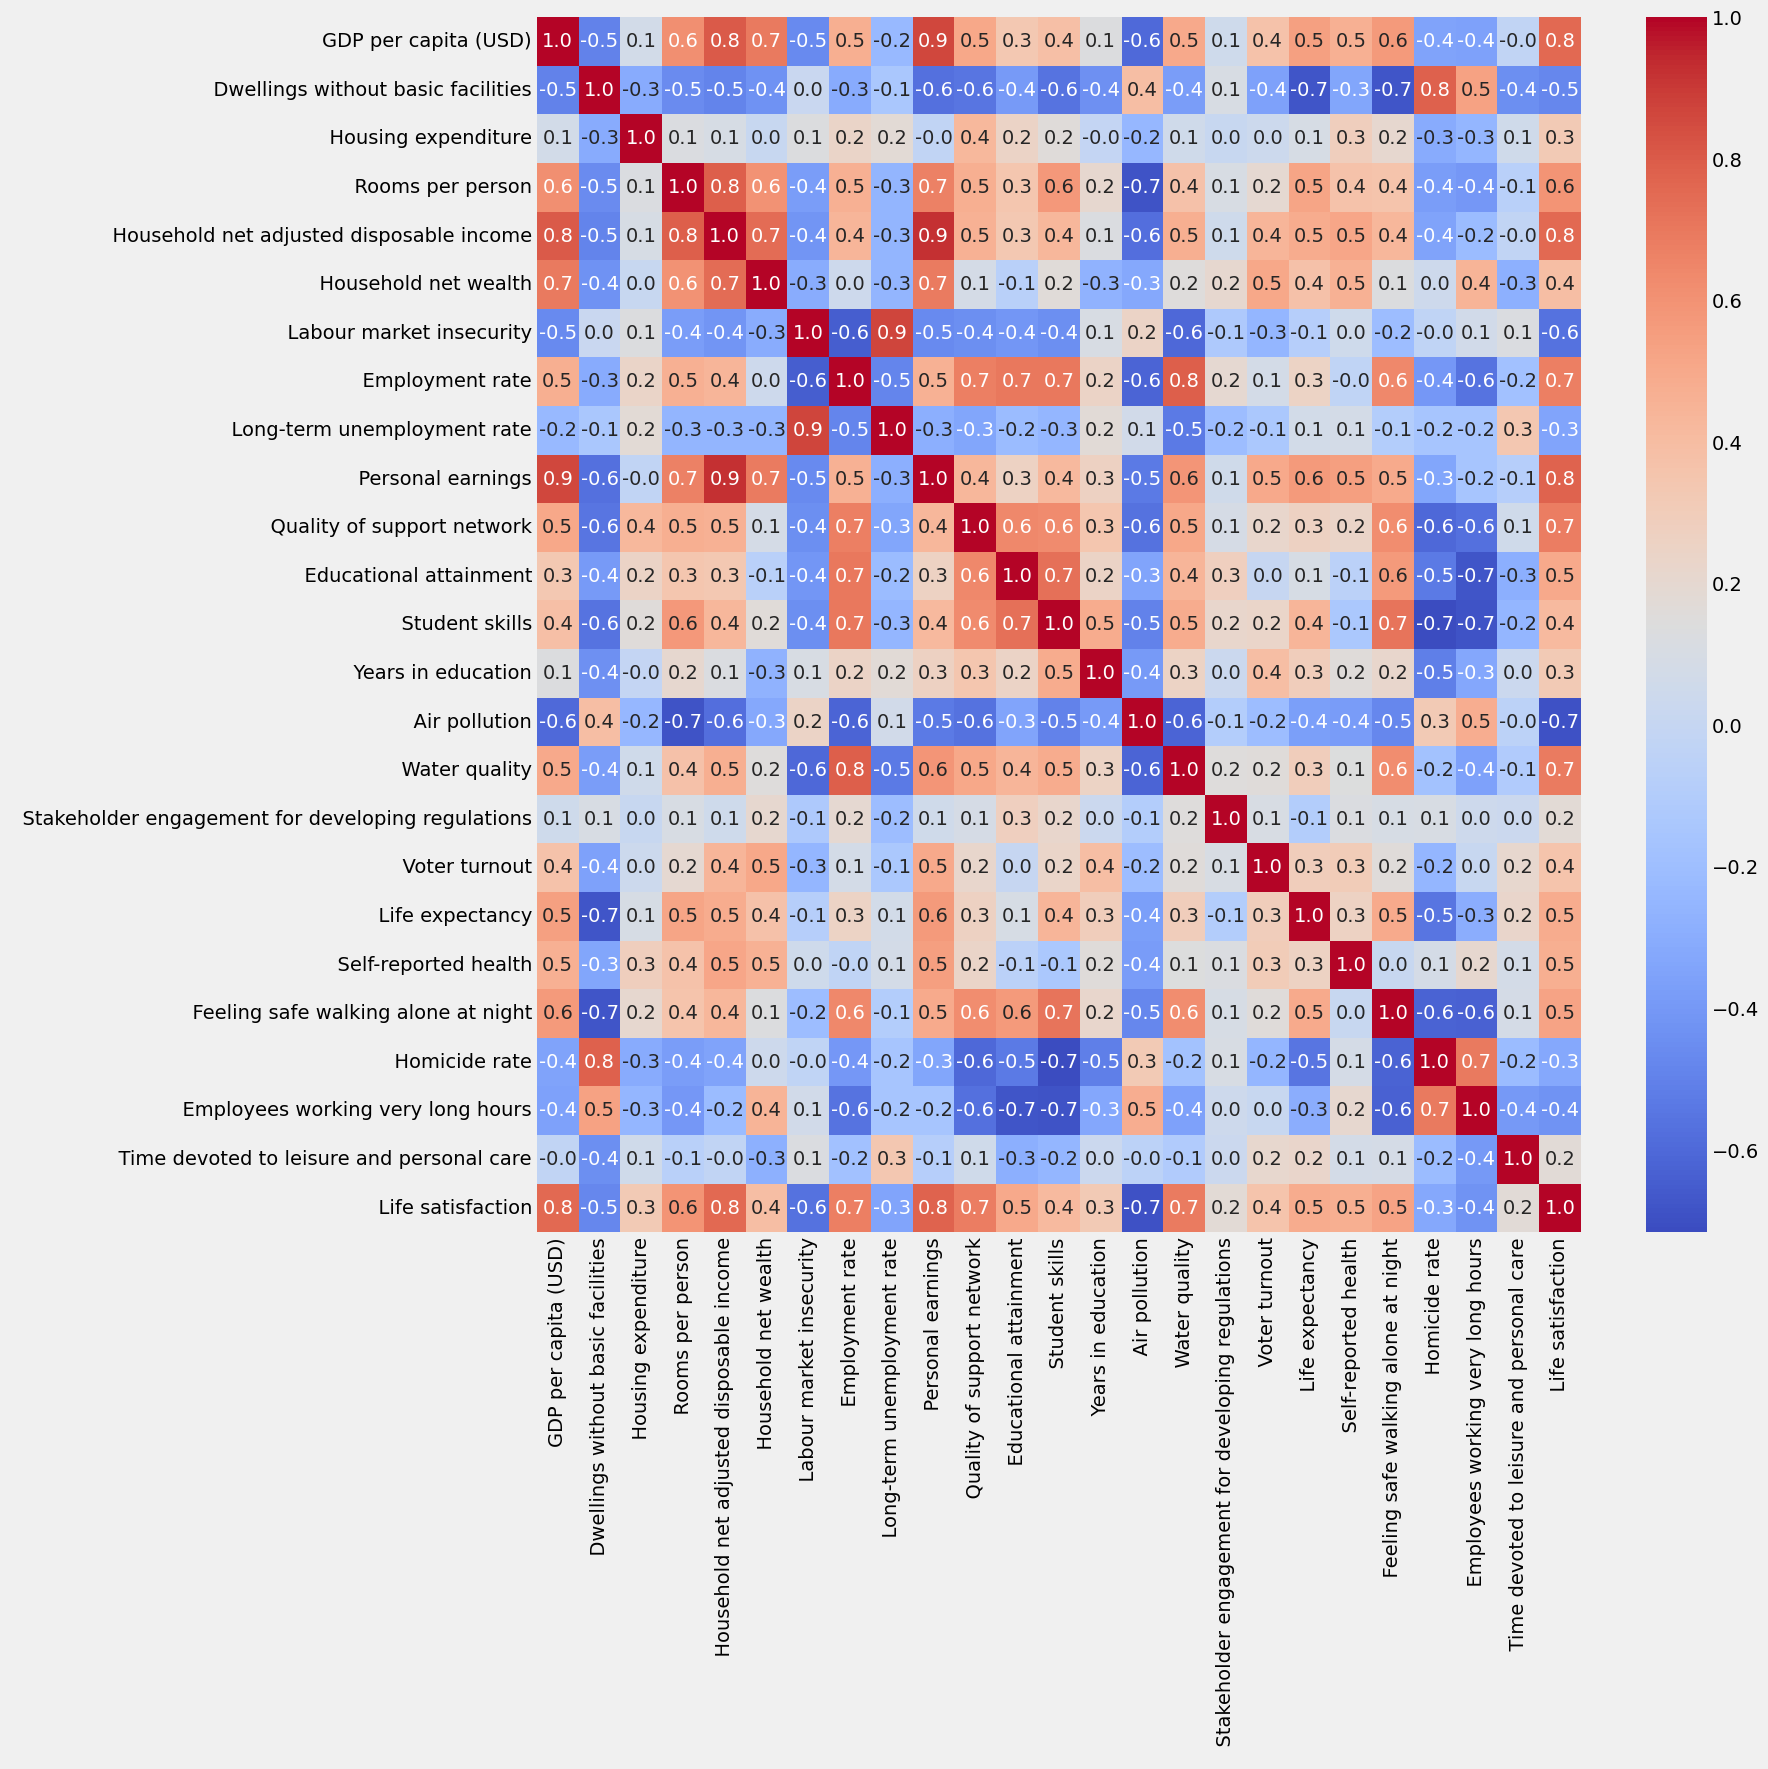

In [38]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:,1:].corr(), cmap='coolwarm', annot=True, fmt='.1f')

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              38 non-null     object 
 1   GDP per capita (USD)                                 38 non-null     int64  
 2     Dwellings without basic facilities                 35 non-null     float64
 3     Housing expenditure                                35 non-null     float64
 4     Rooms per person                                   37 non-null     float64
 5     Household net adjusted disposable income           33 non-null     float64
 6     Household net wealth                               29 non-null     float64
 7     Labour market insecurity                           34 non-null     float64
 8     Employment rate                                    38 non-null     int

In [40]:
print(df.isnull().sum())

Country                                                 0
GDP per capita (USD)                                    0
  Dwellings without basic facilities                    3
  Housing expenditure                                   3
  Rooms per person                                      1
  Household net adjusted disposable income              5
  Household net wealth                                  9
  Labour market insecurity                              4
  Employment rate                                       0
  Long-term unemployment rate                           1
  Personal earnings                                     3
  Quality of support network                            0
  Educational attainment                                1
  Student skills                                        1
  Years in education                                    1
  Air pollution                                         0
  Water quality                                         0
  Stakeholder 

In [41]:
print(df.describe())

       GDP per capita (USD)    Dwellings without basic facilities  \
count             38.000000                             35.000000   
mean           48139.184211                              3.051429   
std            28940.558500                              5.373977   
min             7327.000000                              0.000000   
25%            26553.000000                              0.200000   
50%            43469.500000                              0.500000   
75%            59051.000000                              3.000000   
max           131384.000000                             25.900000   

         Housing expenditure    Rooms per person  \
count              35.000000           37.000000   
mean               20.494286            1.675676   
std                 2.502580            0.413928   
min                14.700000            1.000000   
25%                18.650000            1.400000   
50%                20.600000            1.700000   
75%           

In [42]:
df.columns = df.columns.str.strip()

In [43]:
selected_features = [
    "GDP per capita (USD)", "Employment rate", "Life expectancy", "Self-reported health",
    "Quality of support network", "Educational attainment", "Water quality" 
]

In [44]:
new_df = df.dropna(subset=selected_features + ["Life satisfaction"])

In [45]:
x = new_df[selected_features]
y = new_df["Life satisfaction"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
y_pred_lin = lin_reg.predict(X_test_scaled)

In [54]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Linear Regression - MSE:", mse_lin, "R²:", r2_lin)

Linear Regression - MSE: 0.145994495201124 R²: 0.47742462567830335


# Random Forest

In [50]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred_rf = rf_reg.predict(X_test_scaled)

In [55]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - MSE:", mse_rf, "R²:", r2_rf)

Random Forest - MSE: 0.11793400000000051 R²: 0.5778648769574926


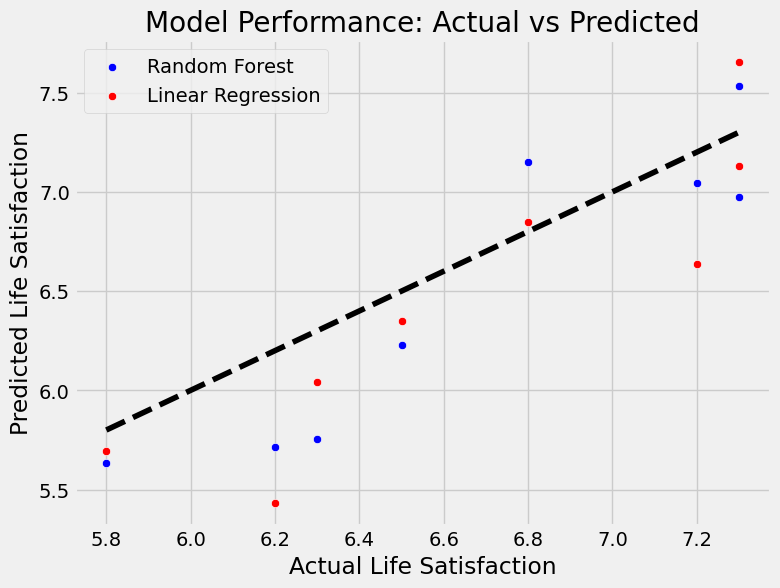

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", color="blue")
sns.scatterplot(x=y_test, y=y_pred_lin, label="Linear Regression", color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
plt.xlabel("Actual Life Satisfaction")
plt.ylabel("Predicted Life Satisfaction")
plt.legend()
plt.title("Model Performance: Actual vs Predicted")
plt.show()

# XGBoost

In [58]:
from xgboost import XGBRegressor

In [59]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [62]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MSE:", mse_xgb, "R²:", r2_xgb)

XGBoost - MSE: 0.26426603864498244 R²: 0.05408129344077883
